In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [63]:
train_dataset=pd.read_csv('mnist_train.csv')
test_dataset=pd.read_csv('mnist_train.csv')
print(train_dataset.shape)
print(test_dataset.shape)

(60000, 785)
(60000, 785)


In [64]:
#print the first images of the train and test dataset

# separate features (pixel values) and labels
X_train = train_dataset.iloc[:, 1:].values  
y_train = train_dataset.iloc[:, 0].values  

X_test = test_dataset.iloc[:, 1:].values
y_test = test_dataset.iloc[:, 0].values

# normalize pixel values (0-255 → 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# reshape to (num_samples, 28, 28, 1) since CNNs expect 4D input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [65]:
print(y_train.shape) #1d array without any pixels values

(60000,)


In [66]:
#resample images 
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


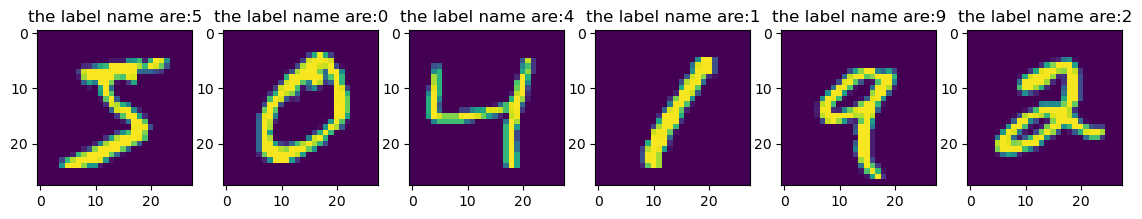

In [67]:
plt.figure(figsize=(14,5))
for x in range(6):
    plt.subplot(1,6,x+1)
    plt.imshow(X_train[x].squeeze())
    plt.title(f"the label name are:{y_train[x]}")

plt.show()

In [ ]:
# Build a CNN with multiple convolution layers using varying kernel sizes and filter counts to extract features.
# convolution layer applying different kernel filter and extract the size identity ,object detection
# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

In [68]:
# 5.Train the model using a suitable loss function and evaluate performance.
iteration=int(input("Enter the no of Echoes to train your model"))

In [69]:
#model train
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#fit the mdoel
log_data=model.fit(X_train,y_train,epochs=iteration,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 24ms/step - accuracy: 0.9926 - loss: 0.0230 - val_accuracy: 0.9959 - val_loss: 0.0132
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9948 - loss: 0.0155 - val_accuracy: 0.9947 - val_loss: 0.0167
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9947 - loss: 0.0142 - val_accuracy: 0.9963 - val_loss: 0.0103
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9972 - loss: 0.0094 - val_accuracy: 0.9959 - val_loss: 0.0121
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9977 - loss: 0.0079 - val_accuracy: 0.9985 - val_loss: 0.0046
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9980 - loss: 0.0067 - val_accuracy: 0.9984 - val_loss: 0.0047
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9975 - loss: 0.0066 - val_accuracy: 0.9985 - val_loss: 0.0047
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9979 -

In [70]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9989 - loss: 0.0027
Test Accuracy: 0.9988


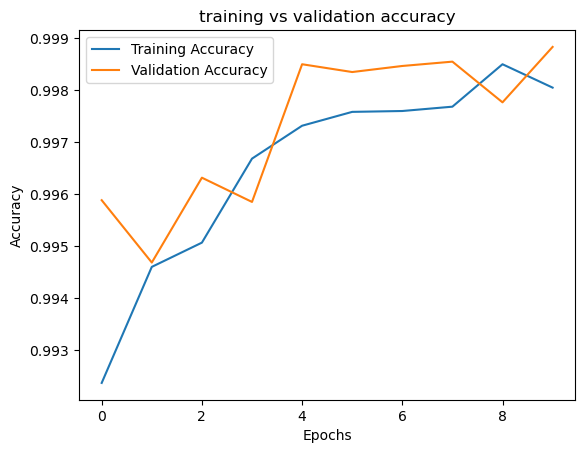

In [71]:
plt.plot(log_data.history['accuracy'], label='Training Accuracy')
plt.plot(log_data.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('training vs validation accuracy')
plt.show()

In [ ]:
# Build a CNN with multiple convolution layers using varying kernel sizes and filter counts to extract features.
# Implement max pooling and average pooling layers to downsample feature maps, and compare their effects on spatial feature retention.
# 4. Design the output layer to produce a segmentation map that classifies each pixel into a predefined category while preserving spatial structure.
# 5. Train the model using a suitable loss function and evaluate performance.
# 6. Perform hyperparameter tuning (learning rate, batch size, dropout, etc.) and analyze how convolution and pooling choices affect segmentation performance.
# 7. Submit a report with your implementation, visualizations of loss curves and segmentation outputs, and a discussion of your findings.

In [72]:
def turn_preforms(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    
    # Con layer 
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(x)
    x_max = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x_avg = layers.AveragePooling2D(pool_size=(2, 2))(x)

   
    x = layers.Concatenate()([x_max, x_avg])


    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)

    # Output layer for pixel-wise classification
    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax', padding='same')(x)

    model = keras.Model(inputs, outputs)
    return model


In [73]:
# Example hyperparameters
input_shape = (128, 128, 3)
num_classes = 10
learning_rate = 0.001
batch_size = 32

# Build and compile model
model = turn_preforms(input_shape, num_classes)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Placeholder for training and evaluation
# Train the model using appropriate dataset (e.g., image segmentation dataset)
# Visualize loss curves and segmentation outputs
# Perform hyperparameter tuning and document the results


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 128, 128,  │        896 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 128, 128,  │     51,264 │ conv2d_20[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 64, 64,    │          0 │ conv2d_21[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d_3 │ (None, 64, 64,    │          0 │ conv2d_21[0][0]   │
│ (AveragePooling2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 64, 64,    │          0 │ max_pooling2d_8[… │
│ (Concatenate)       │ 128)              │            │ average_pooling2… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 64, 64,    │    147,584 │ concatenate_3[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 64, 64,    │    295,168 │ conv2d_22[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 64, 64,    │      2,570 │ conv2d_23[0][0]   │
│                     │ 10)               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 497,482 (1.90 MB)

 Trainable params: 497,482 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:

pred = model.predict(X_test[:5]) # all rows 1st column
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[1.0851975e-09 2.6204791e-10 6.3993028e-10 1.0715872e-02 9.0367184e-12
  9.8913842e-01 8.6229707e-10 7.5828579e-09 8.9913949e-05 5.5741479e-05]
 [9.9998808e-01 9.7580534e-11 9.4161496e-06 1.2900147e-11 3.9386030e-08
  6.9858147e-11 3.0808042e-07 2.4681901e-09 2.2759075e-09 2.1999724e-06]
 [3.6744420e-11 4.8515409e-07 7.2382877e-09 7.1657444e-09 9.9999237e-01
  1.7954952e-07 1.3971598e-09 1.8900192e-08 2.7477947e-07 6.7377309e-06]
 [1.1223455e-08 9.9984694e-01 2.4994085e-06 7.1233394e-11 1.4304453e-04
  2.6116522e-08 1.5629132e-06 3.4425814e-06 1.7393540e-06 7.3494181e-07]
 [1.4828153e-08 7.3379485e-09 6.8214798e-09 1.7517192e-07 5.3132634e-04
  2.3116539e-07 1.7016123e-09 1.9682894e-08 5.7111931e-04 9.9889708e-01]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


TypeError: Invalid shape () for image data

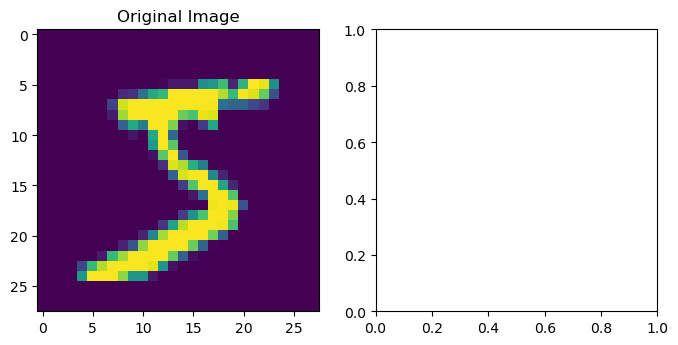

In [60]:
import numpy as np
predictions = model.predict(X_test[:5])
for i, pred in enumerate(predictions):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(X_test[i])
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(np.argmax(pred, axis=-1), cmap='gray')
    plt.title('Segmentation Output')
    plt.show()
